In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from pandas.plotting import scatter_matrix

In [ ]:
# # Load CSV using Pandas from URL
# from pandas import read_csv
# url = 'https://goo.gl/bDdBiA'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# data = read_csv(url, names=names)
# print(data.shape)

In [30]:
# Load CSV using Pandas
filename = './data/diabetes.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Excluded previous column name and given new name
data = pd.read_csv(filename, names=names, header=0) 

print(data.shape)

(768, 9)


In [31]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
print(data.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [34]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

In [35]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [37]:
# On classifcation problems you need to know how balanced the class values are
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In [ ]:
data.corr(method='pearson')

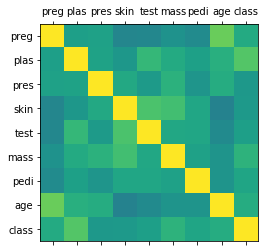

In [59]:
# plot correlation matrix
correlation = data.corr(method='pearson')

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks) 

ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

In [39]:
data.skew()

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64

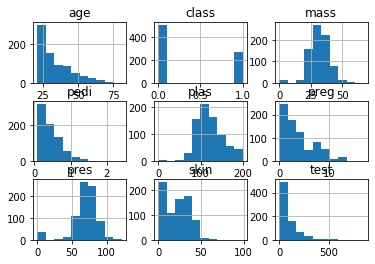

In [45]:
data.hist()
plt.show()

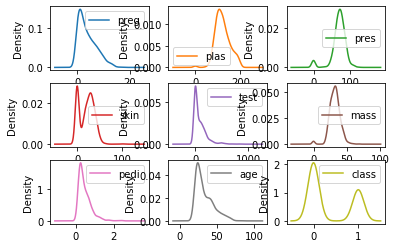

In [46]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

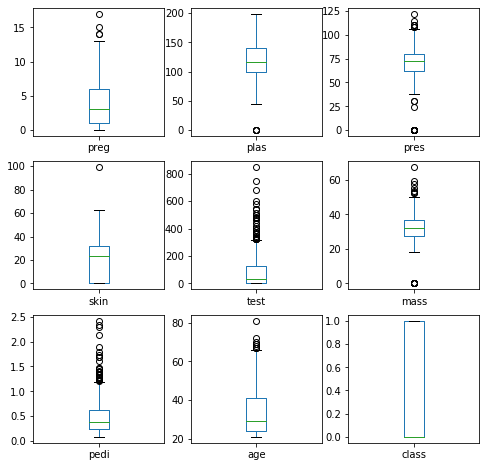

In [48]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(8, 8))
plt.show()

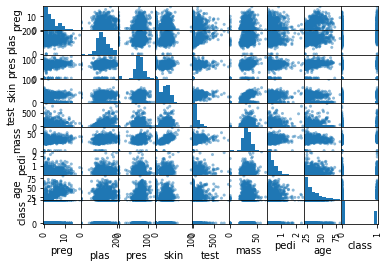

In [62]:
scatter_matrix(data)
plt.show()

## Prepare data

## Rescale data (between 0 and 1)

In [7]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)

rescaledX[0:5, :]

array([[0.353, 0.744, 0.59 , 0.354, 0.   , 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, 0.293, 0.   , 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, 0.   , 0.   , 0.347, 0.254, 0.183],
       [0.059, 0.447, 0.541, 0.232, 0.111, 0.419, 0.038, 0.   ],
       [0.   , 0.688, 0.328, 0.354, 0.199, 0.642, 0.944, 0.2  ]])

## Standardize data (0 mean, 1 stdev)

In [9]:
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)

rescaledX[0:5,:]

array([[ 0.64 ,  0.848,  0.15 ,  0.907, -0.693,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161,  0.531, -0.693, -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, -1.288, -0.693, -1.103,  0.604, -0.106],
       [-0.845, -0.998, -0.161,  0.155,  0.123, -0.494, -0.921, -1.042],
       [-1.142,  0.504, -1.505,  0.907,  0.766,  1.41 ,  5.485, -0.02 ]])

## Normalize data (unit norm of each row)

In [11]:
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)

normalizedX[0:5,:]

array([[0.034, 0.828, 0.403, 0.196, 0.   , 0.188, 0.004, 0.28 ],
       [0.008, 0.716, 0.556, 0.244, 0.   , 0.224, 0.003, 0.261],
       [0.04 , 0.924, 0.323, 0.   , 0.   , 0.118, 0.003, 0.162],
       [0.007, 0.588, 0.436, 0.152, 0.622, 0.186, 0.001, 0.139],
       [0.   , 0.596, 0.174, 0.152, 0.731, 0.188, 0.01 , 0.144]])

## Binarization (set 1 for above threshold)

In [14]:
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions

filename = './data/diabetes.csv' 
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# summarize transformed data
set_printoptions(precision=3)
binaryX[0:5,:]

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.]])

# Feature selection 

## Univariate selection 

In [15]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# load data
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=3)

fit.scores_

array([ 39.67 , 213.162,   3.257,   4.304,  13.281,  71.772,  23.871,
        46.141])

In [16]:
features = fit.transform(X)
# summarize selected features
features[0:5,:]

array([[  6. , 148. ,  33.6,  50. ],
       [  1. ,  85. ,  26.6,  31. ],
       [  8. , 183. ,  23.3,  32. ],
       [  1. ,  89. ,  28.1,  21. ],
       [  0. , 137. ,  43.1,  33. ]])

In [17]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Recursive feature elimination (RFE)

In [18]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


## Principle component analysis

In [19]:
from pandas import read_csv
from sklearn.decomposition import PCA

# load data
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


## Feature importance with extra tree classifier 

In [21]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# load data
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)

print(model.feature_importances_)

[0.109 0.23  0.101 0.082 0.077 0.14  0.119 0.141]


# Performance evaluation with resampling 

## Split into train and test sets

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0.33)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

## K fold cross validation 

In [22]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.086% (5.091%)


## Leave One Out Cross Validation 

In [23]:
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.953% (42.113%)


## Repeated Random Test-Train Splits

In [25]:
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

n_splits = 10
test_size = 0.33
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.496% (1.698%)


# Performance metrics
## Classification accuracy

In [26]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.771 (0.051)


## Logistic loss

In [27]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.494 (0.042)


## Area under ROC curve

In [28]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0) 
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.826 (0.050)


## Confusion matrix

In [29]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


In [30]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



# Metrics for regression
## Mean absolute error

In [41]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

filename = './data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -3.387 (0.667)


## Mean squared error

In [45]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = './data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -23.747 (11.143)


## $R^2$ metric

In [47]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

filename = './data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delimiter=',', names=names)
array = dataframe.values

X = array[:,0:13]
Y = array[:,13]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'r2'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.718 (0.099)


# Compare algorithms

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.701931 (0.049882)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


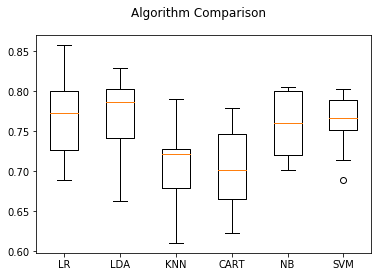

In [49]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Creating pipeline
## Standardizes the data then create a model

In [50]:
# Entire dataset will not be standardize 
# Each fold will be standardize to avoid data leakage

# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load data
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


## Pipeline extract and combine features before modeling

In [51]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# load data
filename = './data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7721633629528366


# Emsembles - Improve performance with emsembles

## Bootstrap aggregation/Bagging 
## Bagged decision trees